In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


dataframe = pd.read_csv('../Crash_Data/Motor_Vehicle_Collisions_-_Crashes.csv')
dataframe

C:\Users\fallo\AppData\Local\Temp\ipykernel_15796\1486038770.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('../Crash_Data/Motor_Vehicle_Collisions_-_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218626,11/04/2025,19:45,BROOKLYN,11223.0,40.602020,-73.970510,"(40.60202, -73.97051)",AVENUE S,E 2 ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4854977,Sedan,Motorcycle,NaN,NaN,NaN
2218627,11/04/2025,17:37,MANHATTAN,10022.0,40.763416,-73.968780,"(40.763416, -73.96878)",NaN,NaN,109 E 60 ST,...,Unspecified,Unspecified,NaN,NaN,4855362,Sedan,Motorcycle,Sedan,NaN,NaN
2218628,10/27/2025,16:41,NaN,NaN,40.667915,-73.996414,"(40.667915, -73.996414)",GOWANUS EXPY (BQE),NaN,NaN,...,Unspecified,NaN,NaN,NaN,4855376,Flat Bed,Sedan,NaN,NaN,NaN
2218629,10/22/2025,20:22,QUEENS,11375.0,40.724968,-73.845505,"(40.724968, -73.845505)",108 ST,69 AVE,NaN,...,Unspecified,NaN,NaN,NaN,4855413,Sedan,NaN,NaN,NaN,NaN


In [20]:
df = dataframe 

In [21]:
df.drop(['ZIP CODE','LATITUDE','LONGITUDE','LOCATION'], axis=1, inplace=True)

In [22]:
df = df.dropna(how="all")

In [23]:
df.isna().mean().sort_values(ascending=False) * 100
# seeing what % of data is missing in eatch column


VEHICLE TYPE CODE 5              99.561892
CONTRIBUTING FACTOR VEHICLE 5    99.547649
VEHICLE TYPE CODE 4              98.408208
CONTRIBUTING FACTOR VEHICLE 4    98.348351
VEHICLE TYPE CODE 3              93.045892
CONTRIBUTING FACTOR VEHICLE 3    92.765268
OFF STREET NAME                  82.389771
CROSS STREET NAME                38.208562
BOROUGH                          30.645339
ON STREET NAME                   21.773788
VEHICLE TYPE CODE 2              20.046101
CONTRIBUTING FACTOR VEHICLE 2    16.044984
VEHICLE TYPE CODE 1               0.726664
CONTRIBUTING FACTOR VEHICLE 1     0.352695
NUMBER OF PERSONS KILLED          0.001397
NUMBER OF PERSONS INJURED         0.000811
CRASH DATE                        0.000000
NUMBER OF PEDESTRIANS INJURED     0.000000
CRASH TIME                        0.000000
NUMBER OF MOTORIST KILLED         0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF C

In [24]:
df = df.dropna(axis=1, thresh=len(df) * 0.3)
# keeps columns with at least 30% data. Found on google 

In [25]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,11/01/2023,1:29,BROOKLYN,OCEAN PARKWAY,AVENUE K,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,4675373,Moped,Sedan
3,06/29/2022,6:55,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
4,09/21/2022,13:21,NaN,BROOKLYN BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4566131,Station Wagon/Sport Utility Vehicle,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218631 entries, 0 to 2218630
Data columns (total 18 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ON STREET NAME                 object 
 4   CROSS STREET NAME              object 
 5   NUMBER OF PERSONS INJURED      float64
 6   NUMBER OF PERSONS KILLED       float64
 7   NUMBER OF PEDESTRIANS INJURED  int64  
 8   NUMBER OF PEDESTRIANS KILLED   int64  
 9   NUMBER OF CYCLIST INJURED      int64  
 10  NUMBER OF CYCLIST KILLED       int64  
 11  NUMBER OF MOTORIST INJURED     int64  
 12  NUMBER OF MOTORIST KILLED      int64  
 13  CONTRIBUTING FACTOR VEHICLE 1  object 
 14  CONTRIBUTING FACTOR VEHICLE 2  object 
 15  COLLISION_ID                   int64  
 16  VEHICLE TYPE CODE 1            object 
 17  VEHICLE TYPE CODE 2            object 
dtypes:

In [27]:
print(f"Original rows: [insert original count]")
print(f"Cleaned rows: {len(df)}")
print(f"Cleaned columns: {len(df.columns)}")


Original rows: [insert original count]
Cleaned rows: 2218631
Cleaned columns: 18


In [28]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [29]:
df.to_csv('../Crash_Data/cleaned_data.csv', index=False)

In [30]:
crashes_by_borough = df.groupby("BOROUGH")["NUMBER OF PERSONS INJURED"].sum().sort_values(ascending=False)
crashes_by_borough

BOROUGH
BROOKLYN         172773.0
QUEENS           131244.0
BRONX             79093.0
MANHATTAN         77657.0
STATEN ISLAND     19391.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

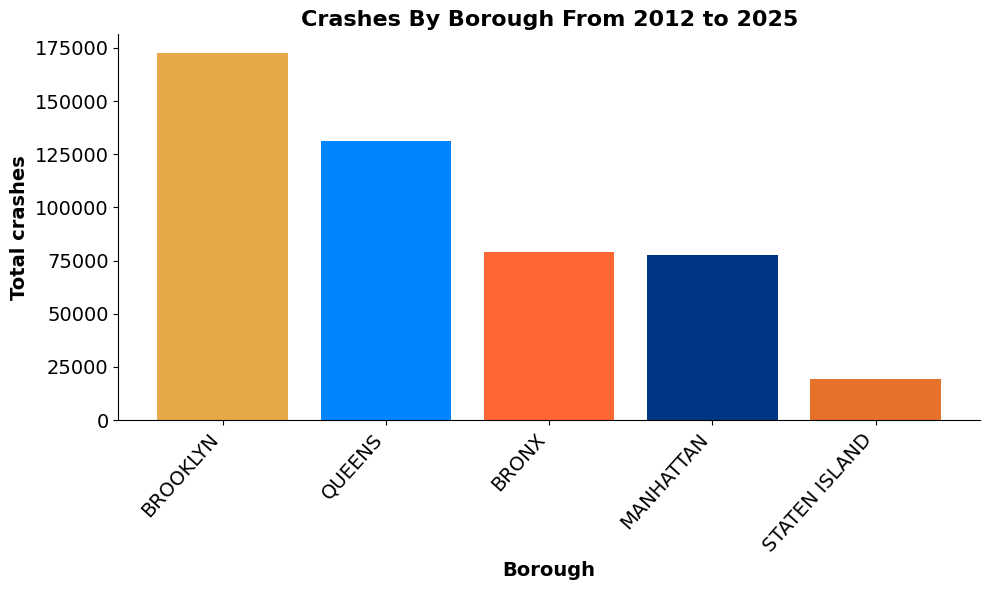

In [31]:
plt.figure(figsize=(10,6))
colors = ["#e5aa47","#0085ff","#fe6632","#003585","#e67128"]
#These are the colors taken from the flags of each borough

plt.bar(crashes_by_borough.index,crashes_by_borough.values,
        color=colors, linewidth=4,)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Borough", fontsize=14, fontweight="bold")
plt.ylabel("Total crashes", fontsize=14, fontweight="bold")
plt.title("Crashes By Borough From 2012 to 2025", fontsize=16, fontweight="bold")
plt.xticks(rotation=48, ha="right")
plt.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig("../plots/CrashesbyBorough.png")
plt.show()

#Visualazion for crashes by borough, choose bar chart for it's simplicity

In [32]:
df["CRASH TIME"] = pd.to_datetime(df["CRASH TIME"], format='%H:%M')
df["Crash Hour"] = df['CRASH TIME'].dt.hour

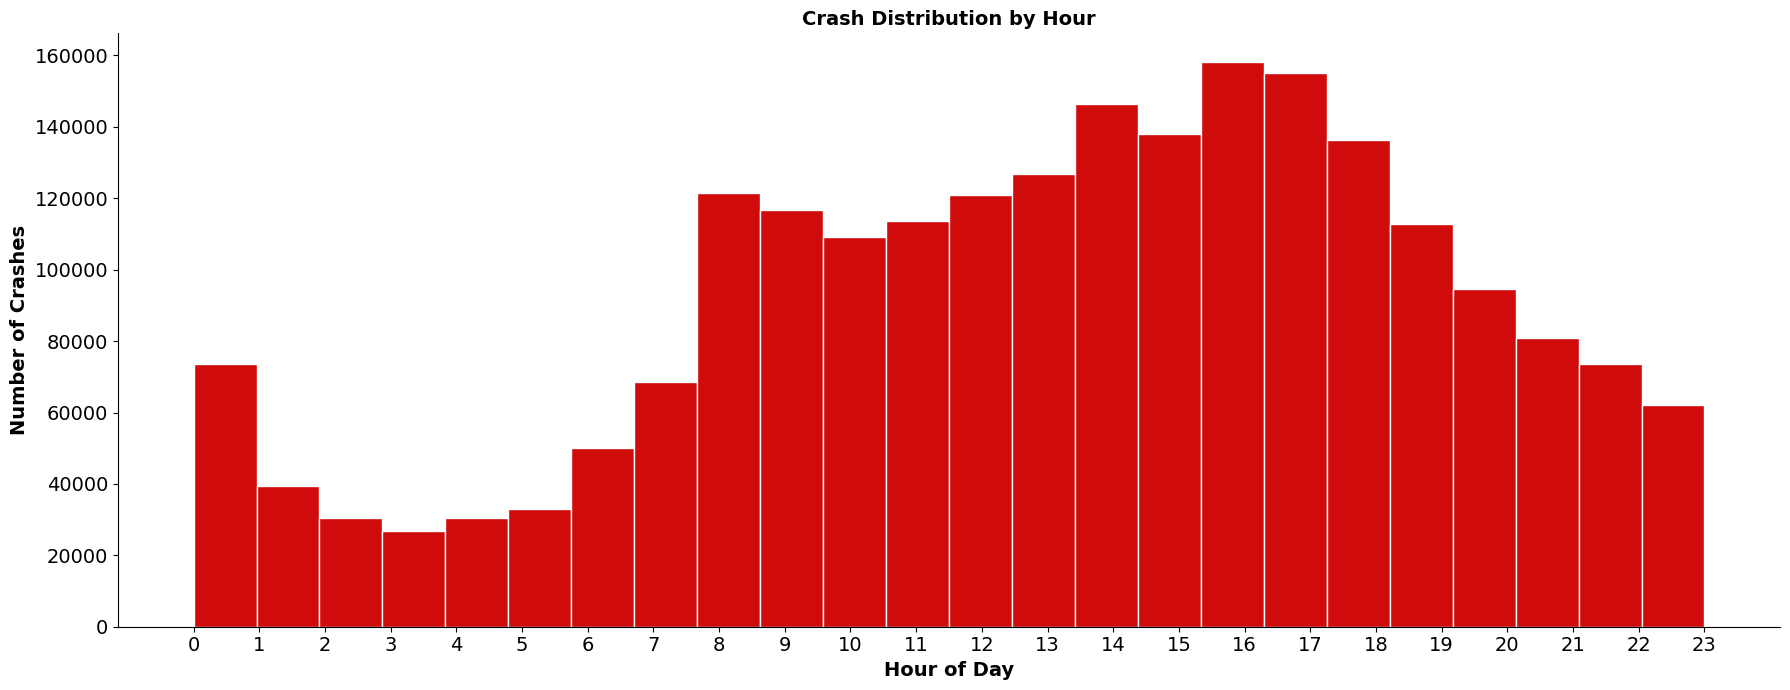

In [33]:
plt.figure(figsize=(18,7))
plt.hist(
    df["Crash Hour"],
    bins=24,
    color = "#cf0b0b",
    edgecolor= "#ffffffff",
    align='mid'
)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xlabel("Hour of Day", fontsize=14, fontweight="bold")
plt.ylabel("Number of Crashes", fontsize=14, fontweight="bold")
plt.title("Crash Distribution by Hour", fontsize=14, fontweight="bold")
plt.xticks(range(0,24))
plt.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig("../plots/MostCommonTimeofCrash.png")
plt.show()

#Wanted a better idea of what time people crash most offen, used hist for more practice

In [34]:
total_injured = df["NUMBER OF PERSONS INJURED"].sum()
total_killed = df["NUMBER OF PERSONS KILLED"].sum()

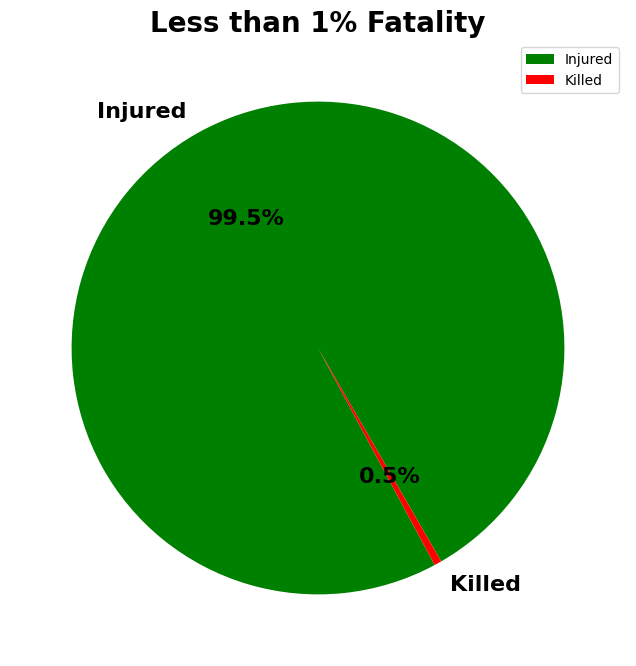

In [35]:
plt.figure(figsize=(8,8))
plt.pie(
    [total_injured, total_killed],
    labels = ["Injured", "Killed"],
    autopct='%1.1f%%',
    startangle=300,
    colors= ["Green","Red"],
    textprops={'fontsize': 16, 'weight':'bold'}
)



plt.legend(
)

plt.title("Less than 1% Fatality", fontsize=20, fontweight="bold")
plt.savefig("../plots/Injury_v_Fatality.png")
plt.show()

#Wanted to check fatality rates and was very surprised. 
#Used pie chart since there's only two things to compare
